In [1]:
#Import scikit-learn dataset library
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Import svm model
from sklearn.neighbors import KNeighborsClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Load dataset
DataFrame= {
    'kamera': { 'training':  '', 'testing': '' }
}

DataFrame['kamera']['training'] = pd.read_csv("Dataframe kesegaran [Kamera][Training].csv")
DataFrame['kamera']['testing'] = pd.read_csv("Dataframe kesegaran [Kamera][Testing].csv")

In [3]:
DataFrame['kamera']['training']

,filename,contrast_00,contrast_45,contrast_90,contrast_135,corellation_00,corellation_45,corellation_90,corellation_135,homogeneity_00,...,variance_90,variance_135,r,g,b,h,s,i,grayscale,class
0,IMG_3342.JPG,33.322281,75.659061,47.212660,65.617893,0.000763,0.000753,0.000757,0.000756,0.312801,...,9.376959e-09,7.552714e-09,0.540711,0.540845,0.596598,0.557870,0.030893,0.487570,0.557514,0
1,IMG_3346.JPG,138.419476,246.026226,157.925135,228.586149,0.001438,0.001296,0.001410,0.001319,0.170747,...,6.320776e-09,5.233663e-09,0.553729,0.561722,0.652987,0.588211,0.035111,0.317462,0.588140,0
2,IMG_3348.JPG,167.498647,264.764028,171.277559,260.403869,0.001131,0.001059,0.001133,0.001063,0.160965,...,7.643067e-09,6.313966e-09,0.594296,0.611894,0.670473,0.623880,0.024370,0.158512,0.627432,0
3,IMG_3351.JPG,88.244587,153.657263,107.873339,158.712753,0.001072,0.001034,0.001062,0.001031,0.209957,...,1.085173e-08,8.683145e-09,0.567326,0.563095,0.661655,0.595969,0.032715,0.636331,0.593136,0
4,IMG_3355.JPG,72.725578,150.810652,103.615896,138.556451,0.000959,0.000924,0.000945,0.000931,0.204643,...,5.324040e-09,4.685363e-09,0.540630,0.538334,0.664814,0.579472,0.043566,0.572263,0.576500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,IMG_4613.JPG,141.679072,214.065658,148.492618,209.529667,0.001867,0.001697,0.001852,0.001708,0.201219,...,1.463449e-08,1.213749e-08,0.510666,0.535889,0.620094,0.554342,0.034293,0.112989,0.558132,1
228,IMG_4615.JPG,63.408588,111.276583,71.295030,115.036580,0.001156,0.001132,0.001156,0.001129,0.206620,...,9.498584e-09,7.652917e-09,0.459229,0.473350,0.596187,0.507865,0.044315,0.171585,0.508487,1
229,IMG_4619.JPG,118.319882,199.715915,147.966843,219.075020,0.001656,0.001523,0.001611,0.001489,0.183848,...,8.698882e-09,7.197076e-09,0.472538,0.456702,0.617355,0.513864,0.048600,0.848341,0.506634,1
230,IMG_4620.JPG,209.649114,329.302685,216.685901,306.910038,0.001243,0.001120,0.001243,0.001145,0.137660,...,6.599259e-09,5.653658e-09,0.526198,0.561021,0.655018,0.579320,0.037632,0.059573,0.585126,1


In [4]:
DataFrame['kamera']['testing']

,filename,contrast_00,contrast_45,contrast_90,contrast_135,corellation_00,corellation_45,corellation_90,corellation_135,homogeneity_00,...,variance_90,variance_135,r,g,b,h,s,i,grayscale,class
0,IMG_3339.JPG,178.681841,310.518197,223.149729,294.780210,0.001052,0.000963,0.001024,0.000974,0.182336,...,8.354481e-09,7.384981e-09,0.573860,0.586884,0.661410,0.606152,0.032419,0.221706,0.607726,0
1,IMG_3341.JPG,80.489296,141.661727,105.218073,169.550437,0.001014,0.000984,0.001003,0.000969,0.244874,...,8.976315e-09,7.233513e-09,0.597394,0.603084,0.690289,0.629206,0.035057,0.365555,0.628577,0
2,IMG_3349.JPG,94.117680,168.386075,115.930303,174.919462,0.000755,0.000737,0.000754,0.000735,0.165005,...,7.920829e-09,6.621549e-09,0.583650,0.612377,0.689173,0.627201,0.031410,0.092207,0.631951,0
3,IMG_3353.JPG,103.501169,172.251845,121.605500,180.218736,0.000657,0.000646,0.000658,0.000644,0.243647,...,1.147307e-08,9.211456e-09,0.646874,0.652511,0.714968,0.669959,0.027979,0.308107,0.670633,0
4,IMG_3363.JPG,96.157480,174.329345,111.066314,169.080662,0.000706,0.000685,0.000700,0.000686,0.167748,...,4.331412e-09,3.571788e-09,0.579911,0.589322,0.646212,0.604229,0.027326,0.356657,0.605322,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,IMG_4596.JPG,107.808255,175.504991,123.947589,171.477153,0.000594,0.000583,0.000593,0.000584,0.223155,...,6.137193e-09,5.225723e-09,0.526912,0.534993,0.638203,0.565116,0.039420,0.266005,0.564978,1
94,IMG_4599.JPG,87.739542,150.480439,104.328679,152.947176,0.000955,0.000927,0.000951,0.000926,0.273806,...,8.506381e-09,7.371939e-09,0.585736,0.602260,0.677263,0.620115,0.029469,0.247495,0.622883,1
95,IMG_4605.JPG,68.989911,117.633269,82.175135,117.594085,0.001189,0.001168,0.001195,0.001168,0.295617,...,1.218335e-08,1.050885e-08,0.611492,0.599525,0.682602,0.629322,0.029352,0.730775,0.625782,1
96,IMG_4617.JPG,101.028912,177.483415,137.994218,189.476285,0.001277,0.001209,0.001249,0.001198,0.287158,...,1.129587e-08,9.298551e-09,0.494569,0.525493,0.624555,0.546993,0.043175,0.109474,0.551622,1


# RGB

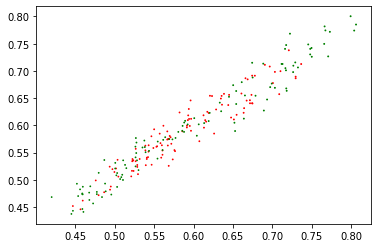

In [5]:
data_feature_training = DataFrame['kamera']['training'][['r', 'g', 'b']]
data_class_training = DataFrame['kamera']['training']["class"]
data_feature_testing = DataFrame['kamera']['testing'][['r', 'g', 'b']]
data_class_testing = DataFrame['kamera']['testing']["class"]


colors = {0: 'r' , 1 : 'g' , 2: 'b' ,}
plt.scatter(data_feature_training['r'], 
            data_feature_training['g'], 
            data_feature_training['b'], 
            c=[colors[k] for k in data_class_training])

In [6]:
#Create a svm Classifier
clf = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))
print(confusion_matrix(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.65      0.63        49
           1       0.62      0.57      0.60        49

    accuracy                           0.61        98
   macro avg       0.61      0.61      0.61        98
weighted avg       0.61      0.61      0.61        98

[[32 17]
 [21 28]]


In [ ]:
labels = ['Mean R', 'Mean G', 'Mean B']

dataframe = DataFrame['kamera']['training'][['r', 'g', 'b', 'class']]
data_segar = dataframe.query("`class` == 0")
data_tidak_segar = dataframe.query("`class` == 1")
data_busuk = dataframe.query("`class` == 2")


r_means = [np.mean(data_segar['r']), np.mean(data_tidak_segar['r'])]
print(r_means)
g_means = [np.mean(data_segar['g']), np.mean(data_tidak_segar['g'])]
print(g_means)
b_means = [np.mean(data_segar['b']), np.mean(data_tidak_segar['b'])]
print(b_means)

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x + width, r_means, width, label='Segar')
rects2 = ax.bar(x, g_means, width, label='Tidak Segar')
# rects3 = ax.bar(x + width, b_means, width, label='Busuk')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('RGB')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# HSI

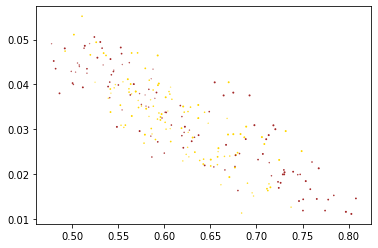

In [7]:
data_feature_training = DataFrame['kamera']['training'][['h', 's', 'i']]
data_class_training = DataFrame['kamera']['training']["class"]
data_feature_testing = DataFrame['kamera']['testing'][['h', 's', 'i']]
data_class_testing = DataFrame['kamera']['testing']["class"]


colors = {0: 'gold' , 1 : 'brown' , 2: 'pink' ,}
plt.scatter(data_feature_training['h'], 
            data_feature_training['s'], 
            data_feature_training['i'], 
            c=[colors[k] for k in data_class_training])

In [8]:
#Create a svm Classifier
clf = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))
print(confusion_matrix(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66        49
           1       0.66      0.71      0.69        49

    accuracy                           0.67        98
   macro avg       0.67      0.67      0.67        98
weighted avg       0.67      0.67      0.67        98

[[31 18]
 [14 35]]


In [ ]:
labels = ['Mean H', 'Mean S', 'Mean I']

dataframe = DataFrame['kamera']['training'][['h', 's', 'i', 'class']]
data_segar = dataframe.query("`class` == 0")
data_tidak_segar = dataframe.query("`class` == 1")
data_busuk = dataframe.query("`class` == 2")


h_means = [np.mean(data_segar['h']), np.mean(data_tidak_segar['h']), np.mean(data_busuk['h'])]
print(h_means)
s_means = [np.mean(data_segar['s']), np.mean(data_tidak_segar['s']), np.mean(data_busuk['s'])]
print(s_means)
i_means = [np.mean(data_segar['i']), np.mean(data_tidak_segar['i']), np.mean(data_busuk['i'])]
print(i_means)

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, h_means, width, label='Segar')
rects2 = ax.bar(x, s_means, width, label='Tidak Segar')
rects3 = ax.bar(x + width, i_means, width, label='Busuk')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# GRAYSCALE

In [9]:
data_feature_training = DataFrame['kamera']['training'][['grayscale',]]
data_class_training = DataFrame['kamera']['training']["class"]
data_feature_testing = DataFrame['kamera']['testing'][['grayscale',]]
data_class_testing = DataFrame['kamera']['testing']["class"]


# colors = {0: 'black' , 1 : 'red' , 2: 'blue' ,}
# plt.scatter(data_feature_training['grayscale'],y=""
#             c=[colors[k] for k in data_class_training])

In [10]:
#Create a svm Classifier
clf = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))
print(confusion_matrix(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.63      0.57        49
           1       0.53      0.41      0.46        49

    accuracy                           0.52        98
   macro avg       0.52      0.52      0.51        98
weighted avg       0.52      0.52      0.51        98

[[31 18]
 [29 20]]


In [ ]:
labels = ['Mean Grayscale']

dataframe = DataFrame['kamera']['testing'][['grayscale', 'class']]
data_segar = dataframe.query("`class` == 0")
data_tidak_segar = dataframe.query("`class` == 1")
data_busuk = dataframe.query("`class` == 2")


h_means = np.mean(data_segar['grayscale'])
print(h_means)
s_means = np.mean(data_tidak_segar['grayscale'])
print(s_means)
i_means = np.mean(data_busuk['grayscale'])
print(i_means)


x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, h_means, width, label='Segar', color='green')
rects2 = ax.bar(x, s_means, width, label='Tidak Segar' , color='yellow')
rects3 = ax.bar(x + width, i_means, width, label='Busuk',  color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# GLCM

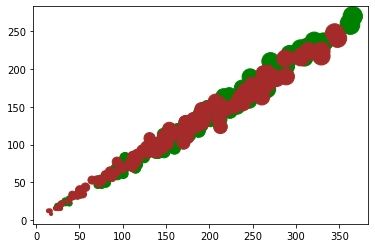

In [11]:
data_feature_training = DataFrame['kamera']['training'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    ]]
data_class_training = DataFrame['kamera']['training']["class"]
data_feature_testing = DataFrame['kamera']['testing'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                  ]]
data_class_testing = DataFrame['kamera']['testing']["class"]


colors = {0: 'green' , 1 : 'brown' , 2: 'magenta' ,}
plt.scatter(
#             data_feature_training['contrast_00'],
            data_feature_training['contrast_45'],
            data_feature_training['contrast_90'],
            data_feature_training['contrast_135'],
#             data_feature_training['corellation_00'],
#             data_feature_training['corellation_45'],
#             data_feature_training['corellation_90'],
#             data_feature_training['corellation_135'],
#             data_feature_training['homogeneity_00'],
#             data_feature_training['homogeneity_45'],
#             data_feature_training['homogeneity_90'],
#             data_feature_training['homogeneity_135'],
#             data_feature_training['entropy_00'],
#             data_feature_training['entropy_45'],
#             data_feature_training['entropy_90'],
#             data_feature_training['entropy_135'],
#             data_feature_training['variance_00'],
#             data_feature_training['variance_45'],
#             data_feature_training['variance_90'],
#             data_feature_training['variance_135'],
            c=[colors[k] for k in data_class_training])

In [12]:
#Create a svm Classifier
clf = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))
print(confusion_matrix(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.57      0.57        49
           1       0.56      0.55      0.56        49

    accuracy                           0.56        98
   macro avg       0.56      0.56      0.56        98
weighted avg       0.56      0.56      0.56        98

[[28 21]
 [22 27]]


# GLCM+RGB

In [13]:
data_feature_training = DataFrame['kamera']['training'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    'r',
                                                    'g',
                                                    'b',
                                                    ]]
data_class_training = DataFrame['kamera']['training']["class"]
data_feature_testing = DataFrame['kamera']['testing'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    'r',
                                                    'g',
                                                    'b',
                                                  ]]
data_class_testing = DataFrame['kamera']['testing']["class"]

In [14]:
#Create a svm Classifier
clf = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))
print(confusion_matrix(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.57      0.57        49
           1       0.56      0.55      0.56        49

    accuracy                           0.56        98
   macro avg       0.56      0.56      0.56        98
weighted avg       0.56      0.56      0.56        98

[[28 21]
 [22 27]]


# GLCM+HSI

In [15]:
data_feature_training = DataFrame['kamera']['training'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    'h',
                                                    's',
                                                    'i',
                                                    ]]
data_class_training = DataFrame['kamera']['training']["class"]
data_feature_testing = DataFrame['kamera']['testing'][['contrast_00',
                                                    'contrast_45',
                                                    'contrast_90',
                                                    'contrast_135',
                                                    'corellation_00',
                                                    'corellation_45',
                                                    'corellation_90',
                                                    'corellation_135',
                                                    'homogeneity_00',
                                                    'homogeneity_45',
                                                    'homogeneity_90',
                                                    'homogeneity_135',
                                                    'entropy_00',
                                                    'entropy_45',
                                                    'entropy_90',
                                                    'entropy_135',
                                                    'variance_00',
                                                    'variance_45',
                                                    'variance_90',
                                                    'variance_135',
                                                    'h',
                                                    's',
                                                    'i',
                                                  ]]
data_class_testing = DataFrame['kamera']['testing']["class"]


In [16]:
#Create a svm Classifier
clf = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
clf.fit(data_feature_training, data_class_training)

#Predict the response for test dataset
y_pred = clf.predict(data_feature_testing)

# print(confusion_matrix(y_test,y_pred))
print(classification_report(data_class_testing,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.57      0.57        49
           1       0.56      0.55      0.56        49

    accuracy                           0.56        98
   macro avg       0.56      0.56      0.56        98
weighted avg       0.56      0.56      0.56        98

